# Boston House Prices Predicition - Using Neural Network

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/boston.csv')
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Input Layer → Fully Connected (64 units) → Tanh Activation → Fully Connected (1 unit, output layer).


In [4]:
class M1(nn.Module):
    def __init__(self, in_dim):
        super(M1, self).__init__()
        self.fc1 = nn.Linear(in_dim, 64)
        self.fc2 = nn.Linear(64, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

## Input Layer → Fully Connected (128 units) → ReLU Activation → Dropout (30%) → Fully Connected (1 unit, output layer).

In [12]:
class M2(nn.Module):
    def __init__(self, in_dim):
        super(M2, self).__init__()
        self.fc1 = nn.Linear(in_dim, 128)
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

##  Input Layer → Fully Connected (128 units) → Tanh Activation → Fully Connected (64 units) → Tanh Activation → Fully Connected (1 unit, output layer).

In [6]:
class M3(nn.Module):
    def __init__(self, in_dim):
        super(M3, self).__init__()
        self.fc1 = nn.Linear(in_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

## Input Layer → Fully Connected (256 units) → ReLU Activation → Fully Connected (128 units) → ReLU Activation → Fully Connected (64 units) → ReLU Activation → Fully Connected (1 unit, output layer).

In [7]:
class M4(nn.Module):
    def __init__(self, in_dim):
        super(M4, self).__init__()
        self.fc1 = nn.Linear(in_dim, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

## Input Layer → Fully Connected (128 units) → ReLU Activation → Dropout (40%) → Fully Connected (64 units) → ReLU Activation → Fully Connected (1 unit, output layer).

In [8]:
class M5(nn.Module):
    def __init__(self, in_dim):
        super(M5, self).__init__()
        self.fc1 = nn.Linear(in_dim, 128)
        self.dropout = nn.Dropout(0.4)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [9]:
def train_eval(model_cls, in_dim, X, y, epochs=300, bs=32, k=2):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    crit = nn.MSELoss()

    mae_list, mse_list, rmse_list, r2_list = [], [], [], []
    ein_mae_list, ein_mse_list, ein_rmse_list, ein_r2_list = [], [], [], []
    all_preds, all_actuals = [], []

    for fold, (tr_idx, val_idx) in enumerate(kf.split(X)):
        X_tr, X_val = torch.tensor(X[tr_idx], dtype=torch.float32), torch.tensor(X[val_idx], dtype=torch.float32)
        y_tr, y_val = torch.tensor(y[tr_idx], dtype=torch.float32).view(-1, 1), torch.tensor(y[val_idx], dtype=torch.float32).view(-1, 1)

        model = model_cls(in_dim)
        opt = optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)

        # Early stopping parameters
        best_val_loss = float("inf")
        patience, patience_counter = 10, 0

        for epoch in range(epochs):
            model.train()
            perm = torch.randperm(X_tr.size(0))
            for i in range(0, X_tr.size(0), bs):
                idx = perm[i:i + bs]
                X_b, y_b = X_tr[idx], y_tr[idx]

                opt.zero_grad()
                out = model(X_b)
                loss = crit(out, y_b)
                loss.backward()
                opt.step()

            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = crit(val_pred, y_val)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break


In [10]:
def train_eval(model_cls, in_dim, X, y, epochs=300, bs=32, k=2):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    crit = nn.MSELoss()

    mae_list, mse_list, rmse_list, r2_list = [], [], [], []
    ein_mae_list, ein_mse_list, ein_rmse_list, ein_r2_list = [], [], [], []
    all_preds, all_actuals = [], []

    for fold, (tr_idx, val_idx) in enumerate(kf.split(X)):
        X_tr, X_val = torch.tensor(X[tr_idx], dtype=torch.float32), torch.tensor(X[val_idx], dtype=torch.float32)
        y_tr, y_val = torch.tensor(y[tr_idx], dtype=torch.float32).view(-1, 1), torch.tensor(y[val_idx], dtype=torch.float32).view(-1, 1)

        model = model_cls(in_dim)
        opt = optim.Adam(model.parameters(), lr=0.005, weight_decay=1e-4)

        # Early stopping parameters
        best_val_loss = float("inf")
        patience, patience_counter = 10, 0

        for epoch in range(epochs):
            model.train()
            perm = torch.randperm(X_tr.size(0))
            for i in range(0, X_tr.size(0), bs):
                idx = perm[i:i + bs]
                X_b, y_b = X_tr[idx], y_tr[idx]

                opt.zero_grad()
                out = model(X_b)
                loss = crit(out, y_b)
                loss.backward()
                opt.step()

            model.eval()
            with torch.no_grad():
                val_pred = model(X_val)
                val_loss = crit(val_pred, y_val)

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

        # Model performance on the validation set
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val).numpy()
            y_val_actual = y_val.numpy()

            mse = mean_squared_error(y_val_actual, y_val_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_val_actual, y_val_pred)
            r2 = r2_score(y_val_actual, y_val_pred)

            mse_list.append(mse)
            rmse_list.append(rmse)
            mae_list.append(mae)
            r2_list.append(r2)

            all_preds.extend(y_val_pred.flatten())
            all_actuals.extend(y_val_actual.flatten())

        # Model performance on the training set (E_in)
        model.eval()
        with torch.no_grad():
            y_tr_pred = model(X_tr).numpy()
            y_tr_actual = y_tr.numpy()

            ein_mse = mean_squared_error(y_tr_actual, y_tr_pred)
            ein_rmse = np.sqrt(ein_mse)
            ein_mae = mean_absolute_error(y_tr_actual, y_tr_pred)
            ein_r2 = r2_score(y_tr_actual, y_tr_pred)

            ein_mse_list.append(ein_mse)
            ein_rmse_list.append(ein_rmse)
            ein_mae_list.append(ein_mae)
            ein_r2_list.append(ein_r2)

        print(f"Fold {fold + 1}: MAE = {mae:.4f}, MSE = {mse:.4f}, RMSE = {rmse:.4f}, R² = {r2:.4f}")
        print(f"Fold {fold + 1} - E_in: MAE = {ein_mae:.4f}, MSE = {ein_mse:.4f}, RMSE = {ein_rmse:.4f}, R² = {ein_r2:.4f}")

    avg_mae = np.mean(mae_list)
    avg_mse = np.mean(mse_list)
    avg_rmse = np.mean(rmse_list)
    avg_r2 = np.mean(r2_list)

    avg_ein_mae = np.mean(ein_mae_list)
    avg_ein_mse = np.mean(ein_mse_list)
    avg_ein_rmse = np.mean(ein_rmse_list)
    avg_ein_r2 = np.mean(ein_r2_list)

    return avg_mae, avg_mse, avg_rmse, avg_r2, avg_ein_mae, avg_ein_mse, avg_ein_rmse, avg_ein_r2, all_preds, all_actuals


In [13]:
models = [M1, M2, M3, M4, M5]
results = {}

for i, model in enumerate(models, 1):
    print(f"\nEvaluating Model {i}...")
    mae, mse, rmse, r2, ein_mae, ein_mse, ein_rmse, ein_r2, preds, actuals = train_eval(model, in_dim=X.shape[1], X=X, y=y, epochs=300, bs=32)
    results[f"M{i}"] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2": r2,
                        "E_in_MAE": ein_mae, "E_in_MSE": ein_mse, "E_in_RMSE": ein_rmse, "E_in_R2": ein_r2,
                        "Preds": preds, "Actuals": actuals}



Evaluating Model 1...
Early stopping at epoch 270
Fold 1: MAE = 2.4651, MSE = 14.3282, RMSE = 3.7853, R² = 0.8234
Fold 1 - E_in: MAE = 1.1865, MSE = 2.6946, RMSE = 1.6415, R² = 0.9692
Early stopping at epoch 213
Fold 2: MAE = 2.6544, MSE = 12.5215, RMSE = 3.5386, R² = 0.8571
Fold 2 - E_in: MAE = 1.6220, MSE = 5.3512, RMSE = 2.3133, R² = 0.9340

Evaluating Model 2...
Early stopping at epoch 110
Fold 1: MAE = 2.2918, MSE = 13.4426, RMSE = 3.6664, R² = 0.8343
Fold 1 - E_in: MAE = 1.9394, MSE = 6.6828, RMSE = 2.5851, R² = 0.9237
Early stopping at epoch 83
Fold 2: MAE = 2.6037, MSE = 11.5139, RMSE = 3.3932, R² = 0.8686
Fold 2 - E_in: MAE = 2.1634, MSE = 9.1588, RMSE = 3.0263, R² = 0.8871

Evaluating Model 3...
Early stopping at epoch 89
Fold 1: MAE = 2.3817, MSE = 14.3034, RMSE = 3.7820, R² = 0.8237
Fold 1 - E_in: MAE = 1.1591, MSE = 2.7408, RMSE = 1.6555, R² = 0.9687
Early stopping at epoch 123
Fold 2: MAE = 2.2933, MSE = 9.6987, RMSE = 3.1143, R² = 0.8893
Fold 2 - E_in: MAE = 0.9853, MSE

In [16]:
for model, metrics in results.items():
    print(f"{model}: MAE = {metrics['MAE']:.4f}, MSE = {metrics['MSE']:.4f}, RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")
    print(f"{model} - E_in: MAE = {metrics['E_in_MAE']:.4f}, MSE = {metrics['E_in_MSE']:.4f}, RMSE = {metrics['E_in_RMSE']:.4f}, R² = {metrics['E_in_R2']:.4f}")

M1: MAE = 2.5598, MSE = 13.4249, RMSE = 3.6619, R² = 0.8402
M1 - E_in: MAE = 1.4043, MSE = 4.0229, RMSE = 1.9774, R² = 0.9516
M2: MAE = 2.4478, MSE = 12.4782, RMSE = 3.5298, R² = 0.8514
M2 - E_in: MAE = 2.0514, MSE = 7.9208, RMSE = 2.8057, R² = 0.9054
M3: MAE = 2.3375, MSE = 12.0010, RMSE = 3.4481, R² = 0.8565
M3 - E_in: MAE = 1.0722, MSE = 2.3708, RMSE = 1.5350, R² = 0.9720
M4: MAE = 2.4507, MSE = 11.4225, RMSE = 3.3778, R² = 0.8641
M4 - E_in: MAE = 1.2536, MSE = 2.7753, RMSE = 1.6643, R² = 0.9669
M5: MAE = 2.6131, MSE = 13.7477, RMSE = 3.7074, R² = 0.8366
M5 - E_in: MAE = 2.1823, MSE = 8.6547, RMSE = 2.9386, R² = 0.8969


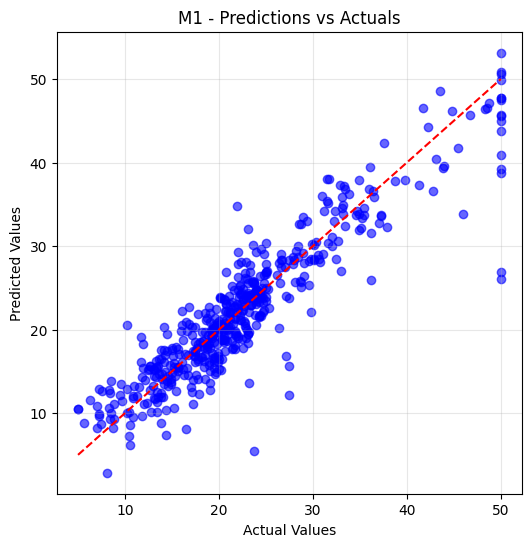

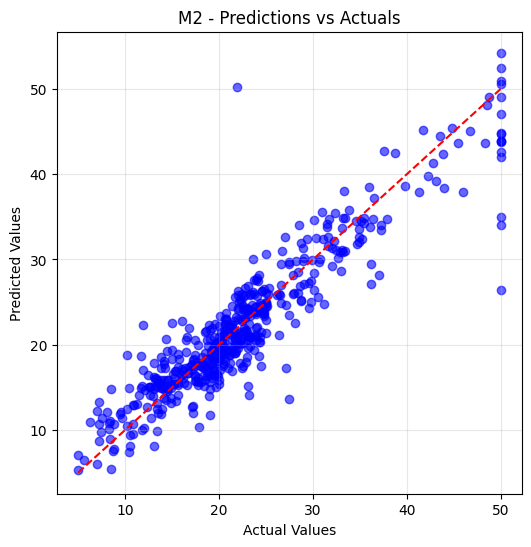

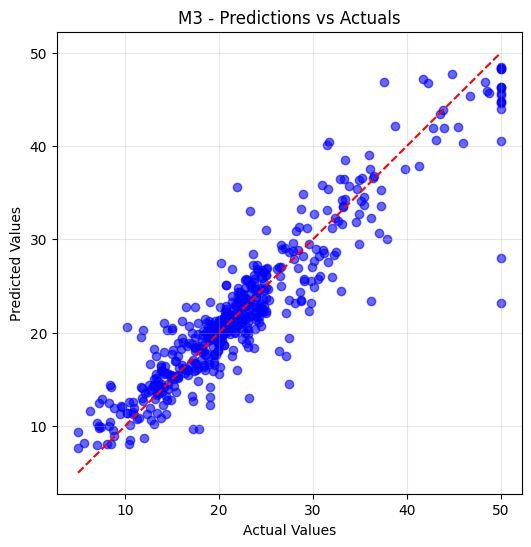

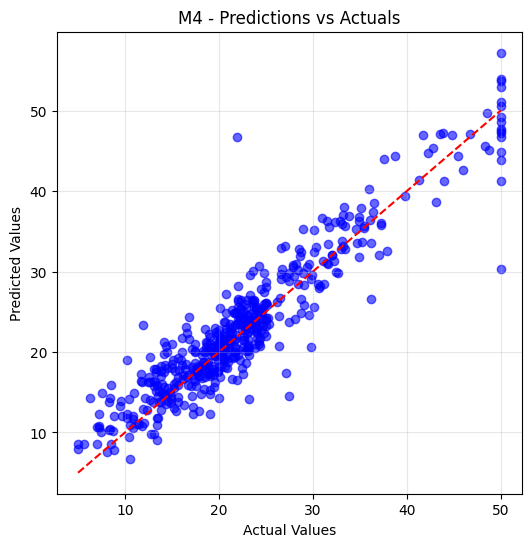

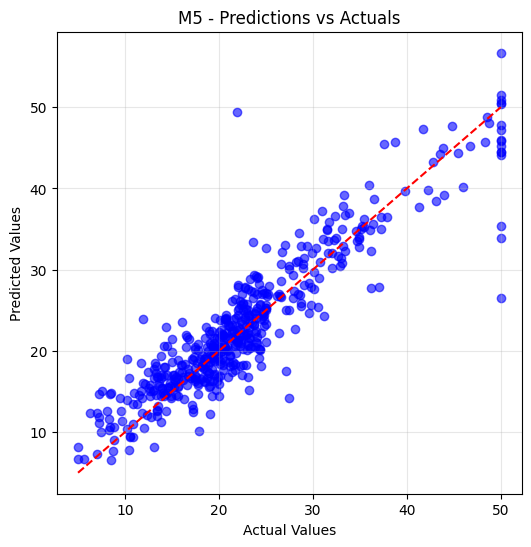

In [15]:
for model, metrics in results.items():
    plt.figure(figsize=(6, 6))
    plt.scatter(metrics["Actuals"], metrics["Preds"], alpha=0.6, color="blue")
    plt.plot([min(metrics["Actuals"]), max(metrics["Actuals"])], [min(metrics["Actuals"]), max(metrics["Actuals"])], color="red", linestyle="--")
    plt.title(f"{model} - Predictions vs Actuals")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid(alpha=0.3)
    plt.show()